In [1]:
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso

import math
from sklearn.model_selection import KFold
from scipy.stats import norm
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D


X = np.loadtxt("hw1-q1x.csv")
Y = np.loadtxt("hw1-q1y.csv")

In [2]:
data = np.column_stack((X,Y))

In [3]:
X_1_added = np.insert(X, 0, 1, axis=1)

In [4]:
### 1(a) data processing

X_data = np.insert(X,0,1, axis=1)

X_data_normalize = scale(X)


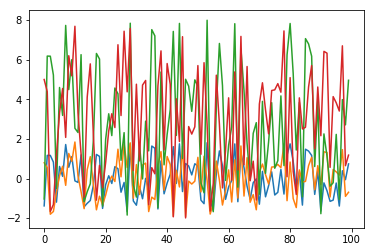

In [5]:
#visualize daa

plt.plot(scale(X))

#bigger fluctuation original data
plt.plot(X)
plt.show()

In [6]:
#shape of the data
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


In [7]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)


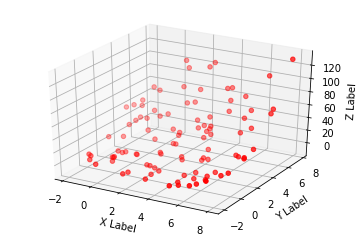

In [8]:

# 3D plot
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


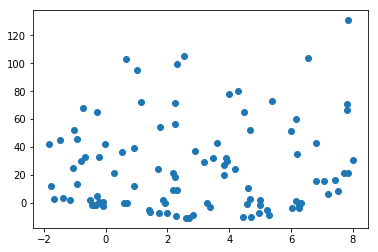

In [9]:
#X_1 to Y

plt.scatter(X[:,0], Y)
plt.show()

[0, 0.1, 1, 10, 100, 1000, 10000, 100000]
[15.287216333000899, 15.287229751057804, 15.28846848168981, 15.35753354010072, 16.10970623112069, 22.707349787503667, 36.159490674735501, 40.309057138652967]
[13.636846645431714, 13.644141740511063, 13.708190243766156, 14.218884791911755, 16.042806992350947, 24.009301776545566, 37.670979724548843, 41.785685343209906]
[13.046291153359908, 13.021060780435864, 12.80468619557821, 11.364034772390617, 8.7702931117130554, 5.0376876428932871, 1.1523770979490482, 0.13414063422156008]


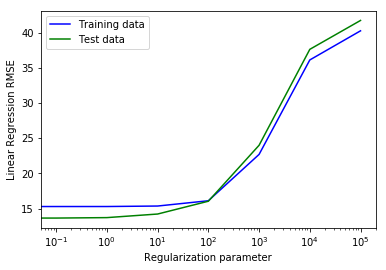

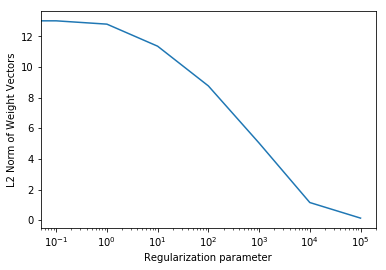

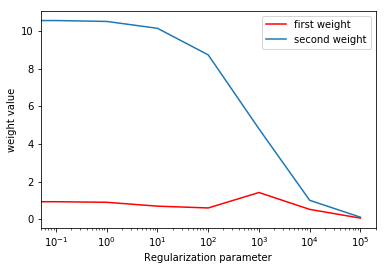

In [10]:
reg_parameter = [0, 0.1] + [10**i for i in range(6)]
print(reg_parameter)

#scale the input

train_set, test_set, y_train, y_test = train_test_split(X_1_added, Y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(train_set)
X_test = pd.DataFrame(test_set)

#store coefficients / intercept

rmse_add = []
test_rmse_add = []
weight_vectors = []
intercept_vectors = []
l2_norm = []

for reg in reg_parameter:
    lin_reg = Ridge(alpha=reg, fit_intercept=False)
    lin_reg.fit(X_train, y_train)

    y_predict = lin_reg.predict(X_train)
    lin_mse = mean_squared_error(y_train, y_predict)
    lin_rmse = np.sqrt(lin_mse)
    rmse_add.append(lin_rmse)
    weight_vectors.append(lin_reg.coef_)
    intercept_vectors.append(lin_reg.intercept_)
    l2_norm.append(np.linalg.norm(lin_reg.coef_))

    test_y_predict = lin_reg.predict(X_test)
    lin_mse_test = mean_squared_error(y_test, test_y_predict)
    lin_rmse_test = np.sqrt(lin_mse_test)
    test_rmse_add.append(lin_rmse_test)
print(rmse_add)
print(test_rmse_add)
print(l2_norm)

plt.plot(reg_parameter, rmse_add, 'b', label='Training data')
plt.plot(reg_parameter, test_rmse_add, 'g', label='Test data')
plt.xlabel('Regularization parameter')
plt.ylabel('Linear Regression RMSE')
plt.xscale('log')
plt.legend()
plt.show()

plt.plot(reg_parameter, l2_norm)
plt.xlabel('Regularization parameter')
plt.ylabel('L2 Norm of Weight Vectors')
plt.xscale('log')
plt.show()

plt.plot(reg_parameter, [i[1] for i in weight_vectors], 'r', label = 'first weight')
plt.plot(reg_parameter, [i[2] for i in weight_vectors], label = 'second weight')
plt.xlabel('Regularization parameter')
plt.ylabel('weight value')
plt.xscale('log')
plt.legend()
plt.show()


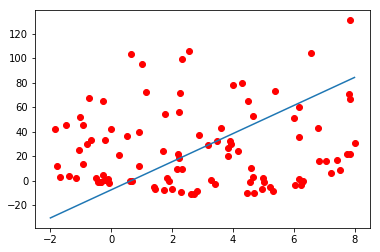

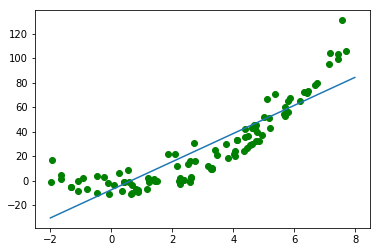

In [11]:
Y_fit = []
t = np.arange(-2,8, 0.01)
for j in range(len(weight_vectors)):
    Y_sub = []
    for i in t:
        Y_sub.append(weight_vectors[j][1]*i + weight_vectors[j][2]*i + weight_vectors[j][0])
    Y_fit.append(Y_sub)
plt.scatter(X[:,0],Y, c= 'r')
plt.plot(t,Y_fit[1])
plt.show()
plt.scatter(X[:,1],Y, c= 'g')
plt.plot(t,Y_fit[1])
plt.show()

[0, 0.1, 1, 10, 100, 1000, 10000, 100000]
[15.287216333000899, 15.287250770459943, 15.290590046779414, 15.562751005356986, 21.535886953318705, 30.313149122374682, 32.099162787317027, 32.295160447149897]
[13.636846645431705, 13.650214062994309, 13.770544791125705, 14.95356797819248, 22.109205253707042, 29.54684806527473, 30.978639461095515, 31.134872988038538]
[27.196646572999231, 27.165639534590927, 26.889729918331007, 24.410782232228289, 12.70502525749626, 2.1930199982161787, 0.23647925201756487, 0.023834626411439994]


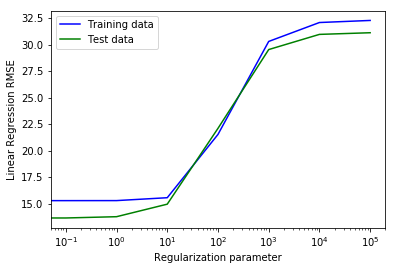

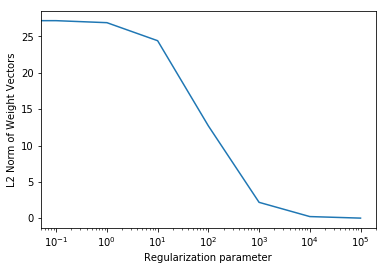

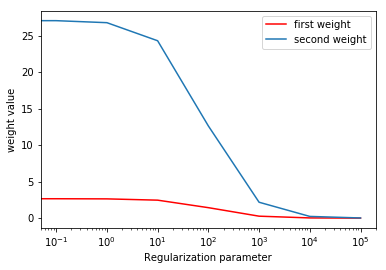

In [12]:
reg_parameter = [ 0, 0.1] + [10**i for i in range(6)]
print(reg_parameter)

#scale the input

train_set, test_set, y_train, y_test = train_test_split(scale(X), Y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(train_set)
X_test = pd.DataFrame(test_set)

#store coefficients / intercept

rmse = []
test_rmse = []
weight_vectors = []
intercept_vectors = []
l2_norm = []

for reg in reg_parameter:
    lin_reg = Ridge(alpha=reg, fit_intercept=True)
    lin_reg.fit(X_train, y_train)

    y_predict = lin_reg.predict(X_train)
    lin_mse = mean_squared_error(y_train, y_predict)
    lin_rmse = np.sqrt(lin_mse)
    rmse.append(lin_rmse)
    weight_vectors.append(lin_reg.coef_)
    intercept_vectors.append(lin_reg.intercept_)
    l2_norm.append(np.linalg.norm(lin_reg.coef_))

    test_y_predict = lin_reg.predict(X_test)
    lin_mse_test = mean_squared_error(y_test, test_y_predict)
    lin_rmse_test = np.sqrt(lin_mse_test)
    test_rmse.append(lin_rmse_test)
print(rmse)
print(test_rmse)
print(l2_norm)

plt.plot(reg_parameter, rmse, 'b', label='Training data')
plt.plot(reg_parameter, test_rmse, 'g', label='Test data')
plt.xlabel('Regularization parameter')
plt.ylabel('Linear Regression RMSE')
plt.xscale('log')
plt.legend()
plt.show()

plt.plot(reg_parameter, l2_norm)
plt.xlabel('Regularization parameter')
plt.ylabel('L2 Norm of Weight Vectors')
plt.xscale('log')
plt.show()

plt.plot(reg_parameter, [i[0] for i in weight_vectors], 'r', label = 'first weight')
plt.plot(reg_parameter, [i[1] for i in weight_vectors], label = 'second weight')
plt.xlabel('Regularization parameter')
plt.ylabel('weight value')
plt.xscale('log')
plt.legend()
plt.show()


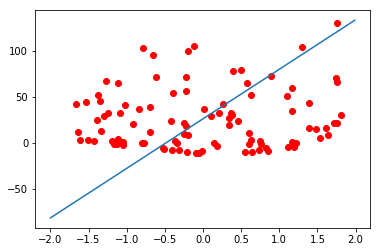

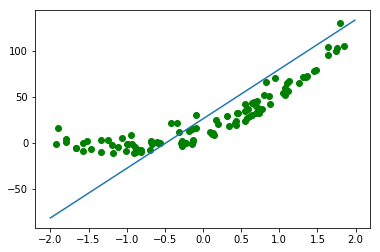

In [13]:
Y_fit = []
t = np.arange(-2,2, 0.01)
for j in range(len(weight_vectors)):
    Y_sub = []
    for i in t:
        Y_sub.append(weight_vectors[j][1]*i + weight_vectors[2][1]*i + intercept_vectors[j])
    Y_fit.append(Y_sub)
plt.scatter(scale(X[:,0]),Y, c= 'r')
plt.plot(t,Y_fit[0])
plt.show()
plt.scatter(scale(X[:,1]),Y, c= 'g')
plt.plot(t,Y_fit[0])
plt.show()

In [14]:
average_validation_scores = {}

for par in reg_parameter:
    lin_reg = Ridge(alpha=par)
    scores = cross_validate(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True
)


    print('For regularization parameter: %.1f' %par)
    print('Training scores: ' ,  str(np.sqrt(-scores['train_score'])))
    print('Average training score: ',np.average(np.sqrt(-scores['train_score'])))
    print('Validation scores: ',np.sqrt(-scores['test_score']))
    print('Average validation score: ', np.average(np.sqrt(-scores['test_score'])))
    print('\n')
    average_validation_scores[par] = np.average(np.sqrt(-scores['test_score']))

For regularization parameter: 0.0
Training scores:  [ 13.53563629  15.59113941  14.70803841  16.47343471  15.71364099]
Average training score:  15.2043779614
Validation scores:  [ 21.28192818  14.15543063  17.56118625   9.48059086  13.64658025]
Average validation score:  15.2251432351


For regularization parameter: 0.1
Training scores:  [ 13.53569454  15.59119444  14.70810316  16.47347909  15.71369282]
Average training score:  15.2044328107
Validation scores:  [ 21.2905267   14.14509034  17.55693361   9.49091017  13.6405595 ]
Average validation score:  15.2248040636


For regularization parameter: 1.0
Training scores:  [ 13.54131016  15.59650369  14.71432828  16.47776941  15.71869727]
Average training score:  15.2097217601
Validation scores:  [ 21.37023137  14.05834316  17.52708441   9.58617926  13.59141503]
Average validation score:  15.226650645


For regularization parameter: 10.0
Training scores:  [ 13.97342616  16.00873959  15.18199425  16.81739565  16.11001425]
Average training 

In [15]:
print(min(average_validation_scores, key=average_validation_scores.get), "is the best pick for lambda")

0.1 is the best pick for lambda


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)


(80, 10)
(80, 10)
(80, 10)
(80, 10)
(20, 10)
               0             0             0             0             0  \
0   1.232119e-04  3.391497e-05  2.893212e-02  1.267388e-02  5.576628e-01   
1   7.473764e-18  1.670911e-02  2.685356e-12  4.410319e-01  7.920057e-08   
2   6.451369e-01  1.794226e-04  4.206026e-02  3.657056e-02  2.250898e-04   
3   5.552670e-01  7.685424e-16  8.840718e-01  1.179519e-10  1.155412e-01   
4   3.609214e-17  1.916351e-01  9.769655e-12  9.723888e-01  2.170749e-07   
5   7.698007e-01  4.317232e-01  6.921908e-01  9.601975e-01  5.109015e-02   
6   5.976761e-02  1.843674e-03  7.304471e-01  1.443819e-01  7.327831e-01   
7   3.748350e-17  5.124746e-08  1.007676e-11  1.398270e-04  2.223647e-07   
8   2.056375e-02  2.764956e-18  4.832193e-01  1.184563e-12  9.320733e-01   
9   4.849161e-01  9.959050e-08  2.073112e-02  2.262576e-04  7.275165e-05   
10  1.864494e-10  9.455845e-01  2.109246e-06  4.597702e-01  1.958651e-03   
11  5.477971e-01  5.037284e-07  2.769316e-0

/Users/peterpark/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


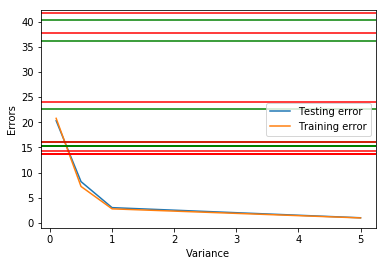

In [17]:
list_dataframes = [] # store list of transformed training set dataframes, each one has a different variance
means = [-1, -0.5, 0, 0.5, 1]
variances = [0.1, 0.5, 1, 5]

for var in variances:
    df = pd.DataFrame()
    for mean in means:
        for column in np.array(train_set).T:
            
            new_col = pd.DataFrame(np.exp(-((column-mean)**2)/(2*var) ) )
            df = pd.concat([df,new_col], axis=1)
    list_dataframes.append(df)
    print(df.shape)

list_test = [] # store list of transformed test set dataframes, each one has a different variance

for var in variances:
    df = pd.DataFrame()
    for mean in means:
        for column in np.array(test_set).T:
            new_col = pd.DataFrame(np.exp(-((column-mean)**2)/(2*var) ) )
            df = pd.concat([df,new_col], axis=1)
    list_test.append(df)
    print(df.shape)
    print(df)

gauss_train_rmse = []
gauss_test_rmse = []
for train_df, test_df in zip(list_dataframes,list_test):
    new_lin_reg = LinearRegression()
    new_lin_reg.fit(train_df, y_train)

    y_predict_train = new_lin_reg.predict(train_df)
    lin_mse = mean_squared_error(y_train, y_predict_train)
    lin_rmse = np.sqrt(lin_mse)
    gauss_train_rmse.append(lin_rmse)

    y_predict_test = new_lin_reg.predict(test_df)
    lin_mse = mean_squared_error(y_test, y_predict_test)
    lin_rmse = np.sqrt(lin_mse)
    gauss_test_rmse.append(lin_rmse)

print(gauss_train_rmse)
print(gauss_test_rmse)

plt.plot(variances, gauss_test_rmse, label='Testing error')
plt.plot(variances, gauss_train_rmse, label='Training error')
for scalar in rmse_add:
    plt.axhline(y=scalar, linestyle='-', color='g')
for scalar in test_rmse_add:
    plt.axhline(y=scalar, linestyle='-', color='r')
plt.xlabel('Variance')
plt.ylabel('Errors')
plt.legend()
plt.show()



In [18]:
###(i)



def polynomial_basis(X, degree):
    t = X[:,1]
    out = []
    for j in t:
        temp = 0
        sub_out = []
        for i in range(1,degree+1):
            sub_out.append(j**i)
        out.append(sub_out)
    return out

deg = [1,2,3,5,9]
reg = [0.01, 0.1, 1, 10]

In [19]:
scores_array = {}
test_error
for i in deg:
    transform_basis_X = np.array(polynomial_basis(X_train, i))
    new_lin_reg = LinearRegression()
    new_lin_reg.fit(transform_basis_X, Y_train)
    #min_x = min(transform_basis_X[:,0])
    #max_x = max(transform_basis_X[:,0])
    #q = np.linspace()
    plt.scatter(transform_basis_X[:,0], Y_train, label = 'weight' + str(deg))
    x_plot = np.linspace(-2, 8, 100)
    plt.plot(x_plot, new_lin_reg.predict(polynomial_basis(np.array([(i,j) for i,j in zip(x_plot,x_plot)]), i)), 'k')
    plt.show()
    scores = cross_validate(new_lin_reg, transform_basis_X, Y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    scores_array[i] =  np.average(np.sqrt(-scores['test_score']))

NameError: name 'test_error' is not defined

In [ ]:
print(min(scores_array, key=scores_array.get), "is the best pick for degree")

In [ ]:
import warnings
warnings.filterwarnings('ignore')
scores_array = {}
for i in reg:
    transform_basis_X = np.array(polynomial_basis(X_train, 9))
    new_lin_reg = Ridge(alpha=i)
    new_lin_reg.fit(transform_basis_X, Y_train)
    #min_x = min(transform_basis_X[:,0])
    #max_x = max(transform_basis_X[:,0])
    #q = np.linspace()
    plt.scatter(transform_basis_X[:,0], Y_train, label = 'weight' + str(reg))
    x_plot = np.linspace(-2, 8, 100)
    plt.plot(x_plot, new_lin_reg.predict(polynomial_basis(np.array([(i,j) for i,j in zip(x_plot,x_plot)]), 9)), 'k')
    plt.show()
    scores = cross_validate(new_lin_reg, transform_basis_X, Y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    scores_array[i] =  np.average(np.sqrt(-scores['test_score']))
    

In [ ]:
print(min(scores_array, key=scores_array.get), "is the best pick for lambda")

In [ ]:
scores_array = {} 
import warnings
warnings.filterwarnings('ignore')

for i in reg:
    transform_basis_X = np.array(polynomial_basis(X_train, 9))
    new_lin_reg = Lasso(alpha=i)
    new_lin_reg.fit(transform_basis_X, Y_train)
    #min_x = min(transform_basis_X[:,0])
    #max_x = max(transform_basis_X[:,0])
    #q = np.linspace()
    plt.scatter(transform_basis_X[:,0], Y_train, label = 'weight' + str(reg))
    x_plot = np.linspace(-2, 8, 100)
    plt.plot(x_plot, new_lin_reg.predict(polynomial_basis(np.array([(i,j) for i,j in zip(x_plot,x_plot)]), 9)), 'k')
    plt.show()
    scores = cross_validate(new_lin_reg, transform_basis_X, Y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    scores_array[i] =  np.average(np.sqrt(-scores['test_score']))
    
    

In [ ]:
print(min(scores_array, key=scores_array.get), "is the best pick for lambda")